In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
df_wine = load_wine(as_frame=True)
df_wine = df_wine.frame
df_wine.columns = [ 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity',
                   'Hue', 'OD280/OD315 of diluted wines',
                   'Proline', 'Class label']

df_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## split the data 

In [2]:

from sklearn.model_selection import train_test_split 

X, y = df_wine.iloc[:, 0:-1 ].values, df_wine.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, 
                                                    test_size = 0.3, random_state = 1, stratify = y
)


In [3]:
print(X_train.shape, X_test.shape)

(124, 13) (54, 13)


## Same Scale 

In [4]:
ex = np.array([1, 2, 3, 4, 5])  

print('Standardization', np.around((ex - ex.mean())/ex.std(), 3))
print('MinMax Scaler', (ex - ex.min())/ex.max() )

Standardization [-1.414 -0.707  0.     0.707  1.414]
MinMax Scaler [0.  0.2 0.4 0.6 0.8]


In [5]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_train_std = stdsc.fit_transform(X_train) 
X_test_std = stdsc.transform(X_test)

## Using L1 Logistic Regression 

In [6]:
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsOneClassifier
lr = OneVsOneClassifier(LogisticRegression(penalty='l1', 
                       solver = 'liblinear',  
                       random_state = 1))

lr.fit(X_train_std, y_train) 
print('Training accuracy', lr.score(X_train_std, y_train)) 
print('Test Accuracy', lr.score(X_test_std, y_test)) 


Training accuracy 1.0
Test Accuracy 0.9814814814814815


In [7]:
for i, estimator in enumerate(lr.estimators_): 
    print(f'Classifier{i}') 
    print(f'intercept {estimator.intercept_}') 
    print(f'coefficient {estimator.coef_}')

Classifier0
intercept [0.]
coefficient [[-2.01876504 -0.23703451 -0.49472678  1.0939948   0.          0.
   0.          0.          0.         -0.22162192  0.         -0.15496745
  -2.41513912]]
Classifier1
intercept [0.]
coefficient [[ 0.          0.          0.          0.          0.          0.
  -2.53398713  0.          0.          0.          0.         -1.22462011
  -0.77776874]]
Classifier2
intercept [-0.1442568]
coefficient [[ 0.72569488  0.17548561  0.48003769  0.          0.28400327  0.
  -1.40857318 -0.18615957  0.          2.40602627 -0.85512761  0.
   0.46527634]]


In [8]:
lr.estimators_[0].coef_

array([[-2.01876504, -0.23703451, -0.49472678,  1.0939948 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.22162192,
         0.        , -0.15496745, -2.41513912]])

In [9]:
df_wine.columns[1]

'Malic acid'

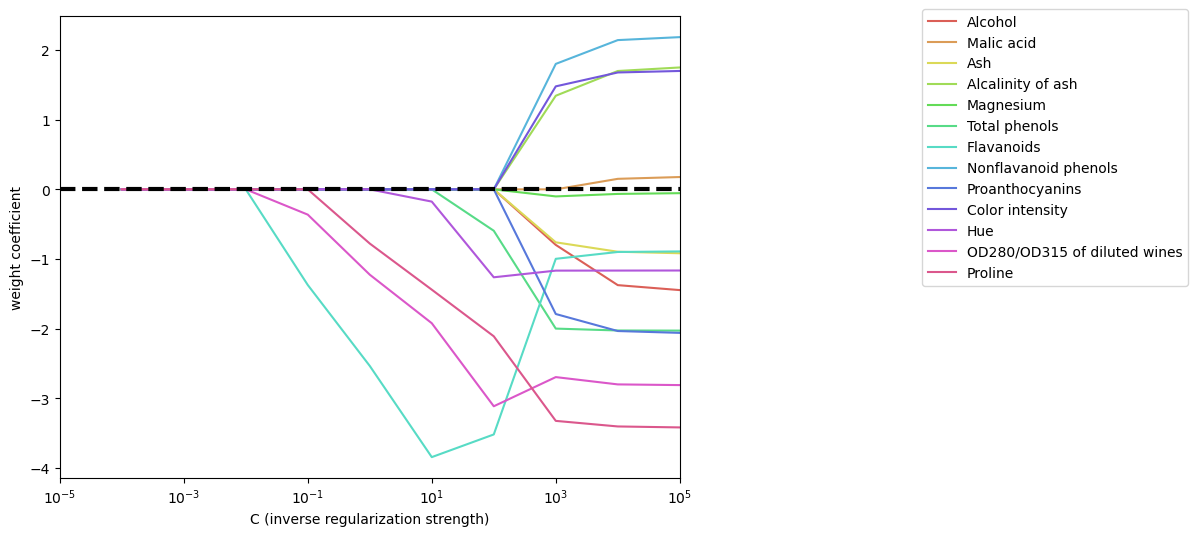

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import  LogisticRegression 
from sklearn.multiclass import OneVsOneClassifier 
feature_names = df_wine.columns[:-1]
fig, ax = plt.subplots(figsize=(8, 6)) 
colors = sns.color_palette('hls', len(feature_names))

weight = [] 
param = []
for c in np.arange(-4, 6): 
    lr = OneVsOneClassifier(LogisticRegression(penalty='l1', C = 10. ** c,
                            solver= 'liblinear', random_state = 1)) 
    lr.fit(X_train_std, y_train)
    weight.append(lr.estimators_[1].coef_)
    param.append(10. ** c) 

weight = np.array(weight).squeeze()

for column, color in zip(range(len(feature_names)), colors): 
    plt.plot(param, weight[:, column], 
            label = feature_names[column], color=color) 
    
plt.axhline(0, linestyle = '--', linewidth = 3, color = 'black') 
plt.xlim(10. ** (-5), 10. **5 )
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')  
plt.ylabel('weight coefficient') 
plt.legend() 
ax.legend(loc = 'upper left', 
         bbox_to_anchor = (1.38, 1.03), 
         ncol=1, fancybox = True)
plt.show()


In [11]:
len(feature_names)

13